In [44]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from tensorflow.keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
import json
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
TRAIN_DIR = 'dataset/train'
TEST_DIR = 'dataset/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print("Number", label, "completed.")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

Number 2 completed.
Number 1 completed.
Number 15 completed.
Number 18 completed.
Number 13 completed.
Number 11 completed.
Number 10 completed.
Number 16 completed.
Number 17 completed.
Number 4 completed.
Number 7 completed.
Number 12 completed.
Number 9 completed.
Number 0 completed.
Number 8 completed.
Number 14 completed.
Number 3 completed.
Number 5 completed.
Number 6 completed.
Number 19 completed.


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

Number 2 completed.
Number 1 completed.
Number 15 completed.
Number 18 completed.
Number 13 completed.
Number 11 completed.
Number 10 completed.
Number 16 completed.
Number 17 completed.
Number 4 completed.
Number 7 completed.
Number 12 completed.
Number 9 completed.
Number 0 completed.
Number 8 completed.
Number 14 completed.
Number 3 completed.
Number 5 completed.
Number 6 completed.
Number 19 completed.


In [7]:
print(test)
print(test['image'])

                         image label
0      dataset/test/2/1144.jpg     2
1       dataset/test/2/988.jpg     2
2      dataset/test/2/1095.jpg     2
3      dataset/test/2/1123.jpg     2
4      dataset/test/2/1061.jpg     2
...                        ...   ...
5995   dataset/test/19/967.jpg    19
5996   dataset/test/19/966.jpg    19
5997  dataset/test/19/1088.jpg    19
5998   dataset/test/19/992.jpg    19
5999   dataset/test/19/907.jpg    19

[6000 rows x 2 columns]
0        dataset/test/2/1144.jpg
1         dataset/test/2/988.jpg
2        dataset/test/2/1095.jpg
3        dataset/test/2/1123.jpg
4        dataset/test/2/1061.jpg
                  ...           
5995     dataset/test/19/967.jpg
5996     dataset/test/19/966.jpg
5997    dataset/test/19/1088.jpg
5998     dataset/test/19/992.jpg
5999     dataset/test/19/907.jpg
Name: image, Length: 6000, dtype: object


In [8]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    print(features.shape)
    features = features.reshape(len(features),50,50,1)
    return features

In [9]:
train_features = extract_features(train['image'])

  0%|          | 0/18000 [00:00<?, ?it/s]

(18000, 50, 50)


In [10]:
test_features = extract_features(test['image'])

  0%|          | 0/6000 [00:00<?, ?it/s]

(6000, 50, 50)


In [11]:
x_train = train_features/255.0
x_test = test_features/255.0

In [12]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [13]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [14]:
y_train = to_categorical(y_train,num_classes = 20)
y_test = to_categorical(y_test,num_classes = 20)

In [15]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(20, activation='softmax'))

/home/itsuserking/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [17]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.2168 - loss: 2.4545 - val_accuracy: 0.9940 - val_loss: 0.0131
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.9920 - loss: 0.0282 - val_accuracy: 0.9997 - val_loss: 8.6334e-04
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9975 - loss: 0.0087 - val_accuracy: 0.9997 - val_loss: 0.0020
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9965 - loss: 0.0119 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9983 - loss: 0.0058 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9984 - loss: 0.0053 - val_accuracy: 0.9950 - val_loss: 0.0267
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9990 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0011
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.9988 - loss: 0.004

In [21]:
model_json = model.to_json()
with open("handNumDetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("handNumDetector.keras")

In [4]:
with open("handNumDetector.json", "r") as json_file:
    model_json = json_file.read()
    
model = model_from_json(model_json)
model.load_weights("handNumDetector.keras")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/home/itsuserking/.local/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [40]:
label=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

In [41]:
def ef(image):
    img = load_img(image,grayscale =  True, target_size=(50,50))
    feature = np.array(img)
    feature = feature.reshape(1,50,50,1)
    return feature/255.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model prediction is  2


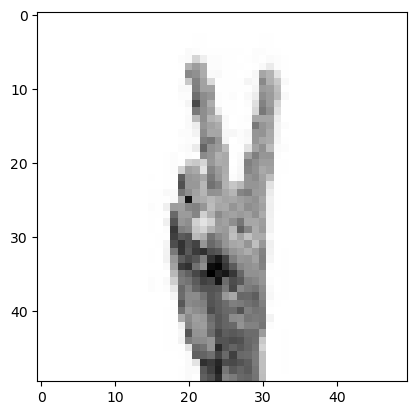

In [51]:
image = 'two.jpeg'
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(50,50),cmap='gray')